In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### IMPORT DATA

In [115]:
data = pd.read_csv('./dataset.csv')

In [116]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

### PREPROCESS DATA

In [118]:
print(data['Target'].unique())

['Dropout' 'Graduate' 'Enrolled']


In [119]:
# Since the value of target column are Dropout, Graduate, Enrolled which are text so we need to convert the to 0,1,2
data['Target']=data['Target'].map({'Dropout':0,'Graduate':1,'Enrolled':2 })

### SPLIT DATA

In [120]:
X=data.drop('Target',axis=1)
y=data['Target']

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,
                                                    stratify=data['Target'],
                                                    random_state=1)

In [122]:
X_train = X_train.values
Y_train =y_train.values
X_test = X_test.values
Y_test = y_test.values

In [123]:
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1,1)


In [124]:
X_train = X_train.T
Y_train = Y_train.reshape(1,X_train.shape[1])
X_test  = X_test.T
Y_test  = Y_test.reshape(1,X_test.shape[1])

### DEFINE MODEL    

In [125]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [126]:
def model(X,Y,learning_rate,iterations):
    m = X_train.shape[1]
    n = X_train.shape[0]

    W = np.zeros((n,1))
    B=0

    cost_list=[]
    
    for i in range(iterations):
        Z = np.dot(W.T,X)+B
        A = sigmoid(Z)

        cost = -(1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))

        dW = (1/m)*np.dot(A-Y,X.T)
        dB= (1/m)*np.sum(A-Y)

        W = W - learning_rate*dW.T
        B = B - learning_rate*dB

        cost_list.append(cost)

        if(i%(iterations/10)==1):
            print("cost after", i, "iterations is: ",cost)
    return W,B,cost_list

In [128]:
iterations = 1000
learning_rate = 0.0005
W,B, cost_list = model(X_train, Y_train, learning_rate=learning_rate,iterations=iterations)

cost after 1 iterations is:  0.5832843681382582
cost after 101 iterations is:  0.19259129534320368
cost after 201 iterations is:  0.11654911070075386
cost after 301 iterations is:  0.07624885208522748
cost after 401 iterations is:  0.04877510999233334
cost after 501 iterations is:  0.027391416953814363
cost after 601 iterations is:  0.009451182103799539
cost after 701 iterations is:  -0.006301623880344358
cost after 801 iterations is:  -0.020545404218435304
cost after 901 iterations is:  -0.033682813860823065


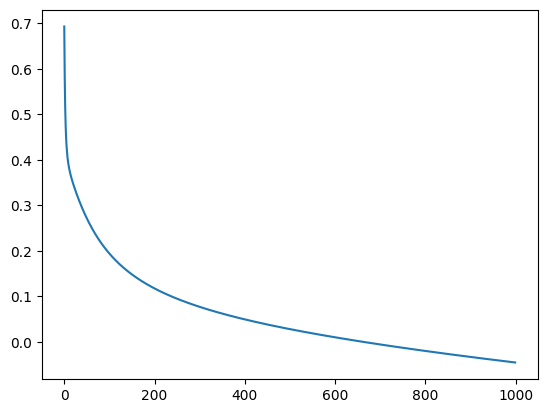

In [129]:
plt.plot(np.arange(iterations),cost_list)
plt.show()